# The Fashion-MNIST Data Set

The Fashion-MNIST dataset is a dataset of Zalando's article images, with 28x28 grayscale images of 70,000 fashion products from 10 categories, and 7,000 images per category. The training set has 60,000 images, and the test set has 10,000 images.

In [0]:
#Load the data
from keras.datasets import fashion_mnist
(X_train,Y_train),(X_test,Y_test) = fashion_mnist.load_data()

# **Analyze the Data**

In [3]:
#Let's look into the shape of the data
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [0]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Number of categories present in the data
print('Number of categories:',len(np.unique(Y_train)))

Number of categories: 10


In [0]:
X_train[0,:,:]

Text(0.5, 1.0, 'Ground Truth : 9')

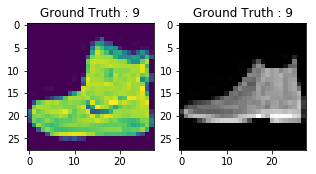

In [7]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[0,:,:])
plt.title("Ground Truth : {}".format(Y_train[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_test[0]))

*The output of above two plots looks like an ankle boot, and this class is assigned a class label of 9.*

# Data Preprocessing

In [0]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [9]:
X_train.shape,X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#rescale the pixel values in range 0 - 1
X_train = X_train / 255.
X_test = X_test / 255.

In [11]:
# Change the labels from categorical to one-hot encoding
Y_train_one_hot = to_categorical(Y_train)
Y_test_one_hot = to_categorical(Y_test)
print("Original one: ",Y_train[1])
print("After one hot: ",Y_train_one_hot[1])


Original one:  0
After one hot:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(X_train, Y_train_one_hot,stratify = Y_train_one_hot, test_size=0.2, random_state=13)

In [13]:
train_X.shape,valid_X.shape

((48000, 28, 28, 1), (12000, 28, 28, 1))

# Model the Data

In [0]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [0]:
batch_size = 64
epochs = 20
num_classes = 10

In [16]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape= (28,28,1), padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1)) 
fashion_model.add(Dense(num_classes, activation='softmax'))

In [17]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [18]:
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)        

# Train the Model

In [19]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 19s 399us/step - loss: 0.4691 - acc: 0.8292 - val_loss: 0.3198 - val_acc: 0.8861
Epoch 2/20
48000/48000 [==============================] - 11s 229us/step - loss: 0.2915 - acc: 0.8931 - val_loss: 0.2642 - val_acc: 0.9069
Epoch 3/20
48000/48000 [==============================] - 11s 227us/step - loss: 0.2412 - acc: 0.9097 - val_loss: 0.2654 - val_acc: 0.9020
Epoch 4/20
48000/48000 [==============================] - 11s 225us/step - loss: 0.2092 - acc: 0.9232 - val_loss: 0.2313 - val_acc: 0.9153
Epoch 5/20
48000/48000 [==============================] - 11s 225us/step - loss: 0.1806 - acc: 0.9326 - val_loss: 0.2165 - val_acc: 0.9198
Epoch 6/20
48000/48000 [==============================] - 11s 223us/step - loss: 0.1612 - acc: 0.9390 - val_loss: 0.2377 - val_acc: 0.9174
Epoch 7/20
48000/4800

# **Evaluate the Model on test data**

In [0]:
test_eval = fashion_model.evaluate(X_test, Y_test_one_hot, verbose=0)

In [21]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.46297670842073857
Test accuracy: 0.9156


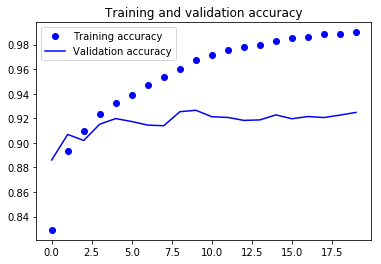

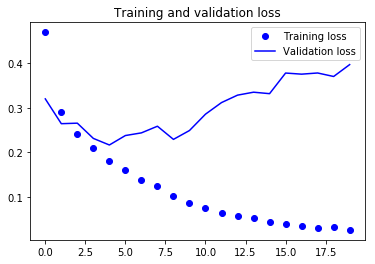

In [22]:
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Adding Dropout into the Network

In [0]:
batch_size = 64
epochs = 20
num_classes = 10

In [0]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [27]:
fashion_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)         

In [0]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [29]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 12s 255us/step - loss: 0.5985 - acc: 0.7777 - val_loss: 0.3569 - val_acc: 0.8711
Epoch 2/20
48000/48000 [==============================] - 11s 238us/step - loss: 0.3799 - acc: 0.8600 - val_loss: 0.2956 - val_acc: 0.8928
Epoch 3/20
48000/48000 [==============================] - 11s 232us/step - loss: 0.3279 - acc: 0.8773 - val_loss: 0.2671 - val_acc: 0.9044
Epoch 4/20
48000/48000 [==============================] - 11s 230us/step - loss: 0.3043 - acc: 0.8876 - val_loss: 0.2613 - val_acc: 0.9068
Epoch 5/20
48000/48000 [==============================] - 11s 232us/step - loss: 0.2846 - acc: 0.8953 - val_loss: 0.2384 - val_acc: 0.9140
Epoch 6/20
48000/48000 [==============================] - 11s 229us/step - loss: 0.2674 - acc: 0.9013 - val_loss: 0.2479 - val_acc: 0.9073
Epoch 7/20
48000/48000 [==============================] - 11s 229us/step - loss: 0.2568 - acc: 0.9039 - val_loss: 0.

In [0]:
#Save the model
fashion_model.save("fashion_model_dropout.h5py")

# Evaluate the model on test data

In [35]:
test_eval = fashion_model.evaluate(X_test, Y_test_one_hot, verbose=1)

10000/10000 [==============================] - 1s 107us/step


In [33]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.22504762536883355
Test accuracy: 0.9222


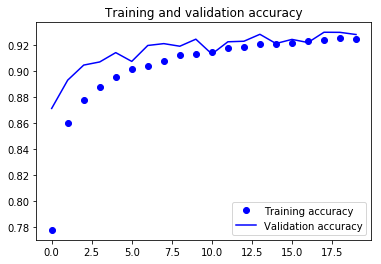

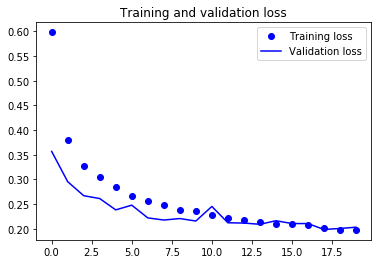

In [34]:
accuracy = fashion_train_dropout.history['acc']
val_accuracy = fashion_train_dropout.history['val_acc']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
predicted_classes = fashion_model.predict(X_test)

In [0]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

Found 9130 correct labels


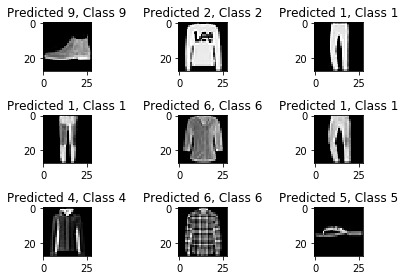

In [0]:
correct = np.where(predicted_classes==Y_test)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], Y_test[correct]))
    plt.tight_layout()

Found 870 incorrect labels


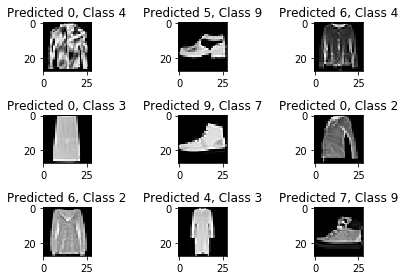

In [0]:
incorrect = np.where(predicted_classes!=Y_test)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], Y_test[incorrect]))
    plt.tight_layout()

# Classification Report

In [0]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(Y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.76      0.92      0.83      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.87      0.87      0.87      1000
     Class 3       0.94      0.90      0.92      1000
     Class 4       0.92      0.80      0.86      1000
     Class 5       0.98      0.98      0.98      1000
     Class 6       0.78      0.74      0.76      1000
     Class 7       0.96      0.97      0.97      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000

